# Libraries

In [19]:
import warnings
warnings.filterwarnings('ignore')

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join

print('[INFO] All libraries were imported')

[INFO] All libraries were imported


## Parameters

In [20]:
# 1. Linear (linear)
# 2. Nonlinear (sin)
# 3. Normally distributed x, linearly independent (lin_ind_normal)
# 4. Non-normally distributed x, linearly independent (lin_ind_mixed)
# 5. Non-normally distributed x, with dependecies & linear correlations (lin_corr_mixed)
# 6. Non-normally distributed x, with dependecies & linear correlations (corr_interactions))

Problem = 'Synthetic'  # IHDP, Synthetic
problem_type = 'lin_corr_mixed'  
p = 0.3
Model = 'Dragonnet'  # 'Dragonnet', 'Smart-Dragonnet', ...
#
# idx = 164  # Used for IHDP

figsize = (20, 2)


if Problem == 'Synthetic':
    Problem = f'{Problem}-{problem_type}-{p}'
else:
    Problem = f'{Problem}-{idx}'

# Permutation Feature Importance

In [21]:
filename = f'./PFI/Problem={Problem}_Model={Model}.csv'
    
df = pd.read_csv(filename)

df.head(3)

,Error_PEHE,Error_ATE,MSE_0,MSE_1,Feature,Iteration
0,-0.007713,-0.002970,0.013364,-0.010642,X1,0
1,0.004798,-0.001620,0.017405,0.013886,X1,1
2,0.014025,0.001715,0.007096,0.018621,X1,2


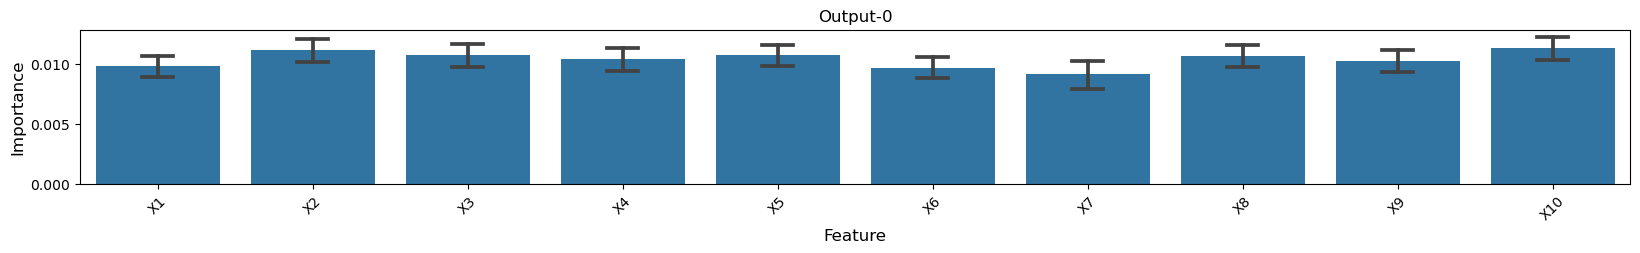

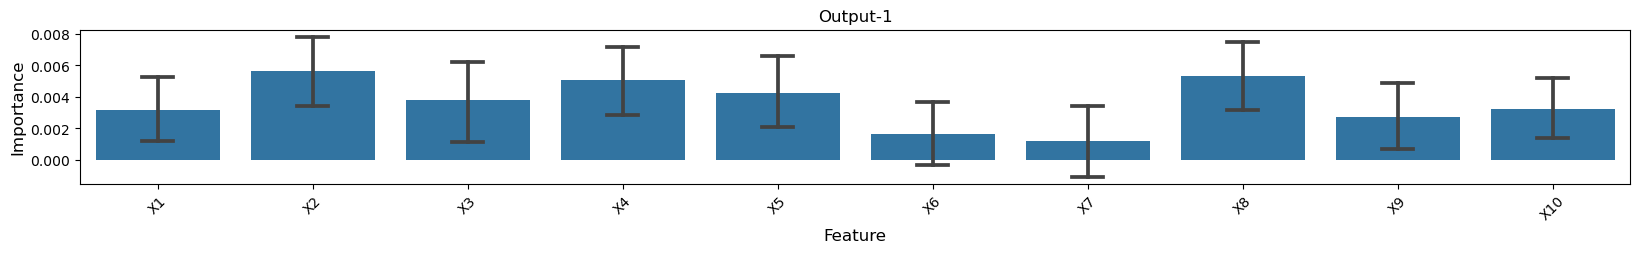

In [22]:
for performance_metric in ['MSE_0', 'MSE_1']:
    plt.figure(figsize=figsize)
    sns.barplot(x="Feature", y=performance_metric, data=df, estimator=np.mean, ci=95, capsize=.2, color='tab:blue');

    plt.ylabel('Importance', size=12)
    plt.xlabel('Feature', size=12)
    plt.xticks(rotation=45)
    plt.title(f'Output-{performance_metric[-1]}');

# SHAP

In [23]:
filename = f'./SHAP/Problem={Problem}_Model={Model}.npz'

shap_values = np.load(filename)['shap_values']
Features = np.load(filename)['Features']

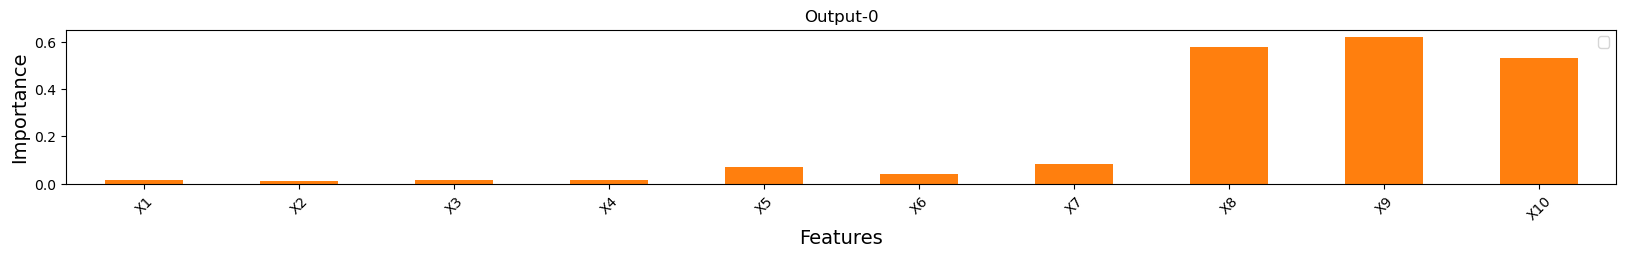

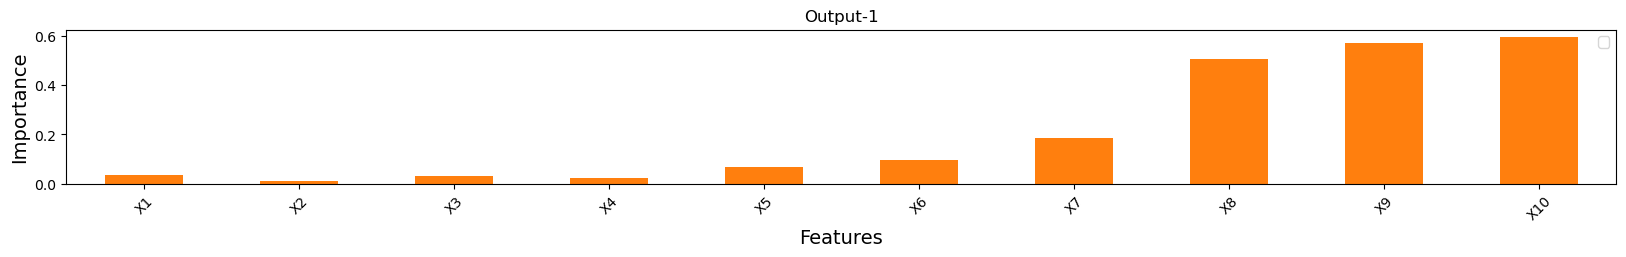

In [24]:
# shap.initjs()
# shap.summary_plot(shap_values[1], plot_type = 'bar', feature_names = Features, plot_size = (8, 10), max_display=25)

for idx in range(2):
    df = pd.DataFrame({})
    df['Features'] = Features
    df['SHAP'] = np.abs(shap_values[idx]).mean(axis=0)
    df.set_index('Features', inplace=True)

    df.plot(kind='bar', figsize = (20, 2), color='tab:orange')

    plt.title(f'Output-{idx}')
    plt.ylabel('Importance', size=14)
    plt.xlabel('Features', size=14)
    plt.xticks(rotation=45)
    plt.legend([])
    plt.show()